In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chess

labels = np.zeros(64)
piece_to_gray = [0.0,1.0,0.8,0.6,0.5,0.4,0.2,-1.0,-0.8,-0.6,-0.5, -0.4,-0.2]
labels[4]=9
labels[6]=7
labels[10]=8
labels[11]=9
labels[13]=12
labels[14]=10
labels[15]=12
labels[16]=12
labels[19]=12
labels[20]=11
labels[21]=11
labels[22]=12
labels[25]=12
labels[33]=6
labels[44]=6
labels[45]=4
labels[47]=6
labels[48]=6
labels[49]=4
labels[50]=2
labels[51]=5
labels[53]=6
labels[54]=6
labels[59]=3
labels[60]=3
labels[62]=1
labels

array([ 0.,  0.,  0.,  0.,  9.,  0.,  7.,  0.,  0.,  0.,  8.,  9.,  0.,
       12., 10., 12., 12.,  0.,  0., 12., 11., 11., 12.,  0.,  0., 12.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  4.,  0.,  6.,  6.,  4.,  2.,  5.,
        0.,  6.,  6.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  1.,  0.])

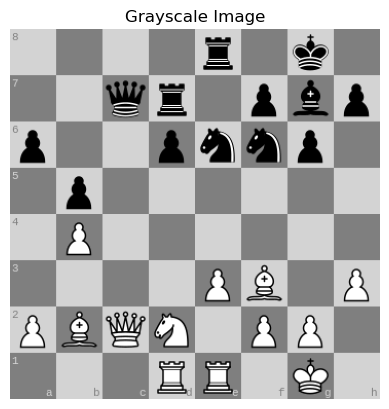

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:\\Users\\omvis\\train\\11161.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display using matplotlib (Note: OpenCV loads in BGR, but matplotlib expects RGB)
plt.imshow(gray, cmap='gray')  # Use the 'gray' colormap for grayscale images
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()



In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define the mapping of pieces to their grayscale values
piece_to_gray = {'K': 1.0, 'Q': 0.8, 'R': 0.6, 'B': 0.5, 'N': 0.4, 'P': 0.2, 
                 'k': -1.0, 'q': -0.8, 'r': -0.6, 'b': -0.5, 'n': -0.4, 'p': -0.2, '.': 0.0}

# Step 1: Preprocessing (Chessboard Alignment & Grid Extraction)
def preprocess_chessboard(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize to standard chessboard size (512x512 pixels)
    gray = cv2.resize(gray, (512, 512))
    
    # Divide the board into 64 cells (8x8 grid)
    cells = [gray[y:y+64, x:x+64] for y in range(0, 512, 64) for x in range(0, 512, 64)]
    return cells

# Step 2: Model Definition
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(13, activation='softmax')  # Output a single grayscale value for each cell
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

# Step 3: Training the Model
def train_model(cells, labels):
    # Normalize and reshape the cells for the model
    X = np.array(cells).reshape(-1, 64, 64, 1) / 255.0  # Normalize to [0, 1]
    y = np.array(labels)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
    return model

In [6]:
image_path = "C:\\Users\\omvis\\train\\11161.png"
    
# Preprocess the image to extract cells
cells = preprocess_chessboard(image_path)

# Labels (example provided in the question)
labels = np.array([ 0.,  0.,  0.,  0.,  9.,  0.,  7.,  0.,  0.,  0.,  8.,  9.,  0.,
       12., 10., 12., 12.,  0.,  0., 12., 11., 11., 12.,  0.,  0., 12.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  4.,  0.,  6.,  6.,  4.,  2.,  5.,
        0.,  6.,  6.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  1.,  0.])

# Train the model
model = train_model(cells, labels)

Epoch 1/30


C:\Users\omvis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.5327 - loss: 2.2879 - val_accuracy: 0.7692 - val_loss: 1.4856
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5327 - loss: 2.6390 - val_accuracy: 0.7692 - val_loss: 1.3214
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5797 - loss: 1.6946 - val_accuracy: 1.0000 - val_loss: 1.2119
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8015 - loss: 1.4633 - val_accuracy: 0.7692 - val_loss: 0.6303
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5927 - loss: 1.1764 - val_accuracy: 0.9231 - val_loss: 0.4392
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6424 - loss: 1.0510 - val_accuracy: 1.0000 - val_loss: 0.3454
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8068 - loss: 0.7822 - val_accuracy: 1.0000 - val_loss: 0.1916
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8903 - loss: 0.5998 - val_accuracy: 1.0000 - val_loss: 0.1088
Epoch 9

In [7]:
# Step 4: Inference
def predict_board(model, cells):
    # Normalize and reshape cells for prediction
    X = np.array(cells).reshape(-1, 64, 64, 1) / 255.0
    predictions = model.predict(X)
    return predictions

In [8]:
image_path = "C:\\Users\\omvis\\train\\11107.png"
    
# Preprocess the image to extract cells
cells = preprocess_chessboard(image_path)
predictions = predict_board(model, cells)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [9]:
predictions = np.array(predictions)
ans=[]
for row in predictions:
    ans.append(np.argmax(row))

ans = np.array(ans).reshape(8, 8)
ans

array([[ 9,  0, 10,  9,  0,  7,  0,  0],
       [12, 12,  0,  0, 12, 12, 10, 12],
       [ 0,  0,  0, 12,  0,  0, 12,  0],
       [ 0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  6,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  6,  6,  0,  0,  0,  6,  6],
       [ 0,  0,  0,  3,  0,  3,  1,  0]], dtype=int64)